# Vertical WS swap

- BWS85 triggered first and BWS 64 triggered 10 ms later
- swap and go over and over again

In [1]:
%run /eos/project/l/liu/Toolbox/myToolbox.py
print '---'
%run /eos/user/e/esenes/PS-analysis-tools/eTools.py
print '---'

Version 0.03. This is the latest version.
Please help me to improve it reporting bugs to guido.sterbini@cern.ch.
Your platform is Linux-3.10.0-693.11.6.el7.x86_64-x86_64-with-redhat-6.10-Carbon
Your folder is /eos/user/e/esenes/Emittance-accuracy-measurement
Your IP is 172.17.0.11
2018-10-11 09:55:16
---
Version 0.1
Use at your own risk. Please report bugs to eugenio.senes@cern.ch
Fork it at https://gitlab.cern.ch/esenes/PS-analysis-tools
---


# User inputs

Ok let's forget matlab and use the data from TIMBER

In [2]:
# Alex's way
ts1 = '2018-10-08 18:14:37.000'
ts2 = '2018-10-08 20:14:26.000'

PSuser = 'CPS:MD4404_BCMS:MD5'

variables = ['PR.DCAFTINJ_1:INTENSITY']
WS_variables = ['PR.BWS.64.V_ROT:PROF_POSITION_IN', 'PR.BWS.64.V_ROT:PROF_DATA_IN','PR.BWS.64.V_ROT:ACQTIMEINCYCLE_IN','PR.BWS.85.V_ROT:PROF_POSITION_IN', 'PR.BWS.85.V_ROT:PROF_DATA_IN','PR.BWS.85.V_ROT:ACQTIMEINCYCLE_IN']

myDataFrame = myToolbox.fromTimberToDataFrame(variables, ts1, ts2, fundamental = PSuser)
myToolbox.addToDataFrameFromCALS(myDataFrame, WS_variables)


# BWS64 swinging flag

In [3]:
myDataFrame['BWS64_first'] = myDataFrame['PR.BWS.64.V_ROT:ACQTIMEINCYCLE_IN'] > myDataFrame['PR.BWS.85.V_ROT:ACQTIMEINCYCLE_IN']

# Rename fields for transparency with the existing script

In [4]:
myDataFrame['Intensity_max'] = myDataFrame['PR.DCAFTINJ_1:INTENSITY']
myDataFrame = myDataFrame.drop('PR.DCAFTINJ_1:INTENSITY',axis=1)

# Cleanup

In [5]:
myDataFrame = myDataFrame.drop(myDataFrame.loc['2018-10-08 19:39:49.900000'].name) # wirescanner fault
myDataFrame = myDataFrame.drop(myDataFrame.loc['2018-10-08 18:41:37.900000'].name) # wirescanner fault
myDataFrame = myDataFrame.drop(myDataFrame.loc['2018-10-08 19:05:01.900000'].name) # wirescanner fault
myDataFrame = myDataFrame.drop(myDataFrame.loc['2018-10-08 19:44:37.900000'].name) # wirescanner fault

# Calculate wire scanner sigma

## BWS 85

In [6]:
# Wirescanner sigma
#position data cleanup (sort, get unique values and the idxes) and conversion to mm
myDataFrame['BWS85_position'] = myDataFrame['PR.BWS.85.V_ROT:PROF_POSITION_IN'].apply(lambda x: np.unique(x, return_index=True)[0]*1e-3)
myDataFrame['BWS85_position_idx'] = myDataFrame['PR.BWS.85.V_ROT:PROF_POSITION_IN'].apply(lambda x: np.unique(x, return_index=True)[1])

#instantiate an array object for the result in the frame
myDataFrame['BWS85_data'] = myDataFrame['BWS85_position_idx'].apply(lambda x: np.empty(len(x)))
pos = np.arange(-50, 50, 0.05)

row, col = myDataFrame.shape

for r in xrange(row):
    myDataFrame['BWS85_data'].iloc[r] = np.interp(pos, myDataFrame['BWS85_position'].iloc[r], myDataFrame['PR.BWS.85.V_ROT:PROF_DATA_IN'].iloc[r][myDataFrame['BWS85_position_idx'].iloc[r]])  
        
#do the fit and get the sigma in mm
myDataFrame['WS85_fit_results_y'] = myDataFrame['BWS85_data'].apply(lambda x: myToolbox.makeGaussianFit_5_parameters(pos,x))
myDataFrame['WS85_sigma_y'] = myDataFrame['WS85_fit_results_y'].apply(lambda x: x[0][-1])
myDataFrame['WS85_mean_y'] = myDataFrame['WS85_fit_results_y'].apply(lambda x: x[0][-2])

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


## BWS 64

In [7]:
# Wirescanner sigma
#position data cleanup (sort, get unique values and the idxes) and conversion to mm
myDataFrame['BWS64_position'] = myDataFrame['PR.BWS.64.V_ROT:PROF_POSITION_IN'].apply(lambda x: np.unique(x, return_index=True)[0]*1e-3)
myDataFrame['BWS64_position_idx'] = myDataFrame['PR.BWS.64.V_ROT:PROF_POSITION_IN'].apply(lambda x: np.unique(x, return_index=True)[1])

#instantiate an array object for the result in the frame
myDataFrame['BWS64_data'] = myDataFrame['BWS64_position_idx'].apply(lambda x: np.empty(len(x)))
pos = np.arange(-50, 50, 0.05)

row, col = myDataFrame.shape

for r in xrange(row):
    myDataFrame['BWS64_data'].iloc[r] = np.interp(pos, myDataFrame['BWS64_position'].iloc[r], myDataFrame['PR.BWS.64.V_ROT:PROF_DATA_IN'].iloc[r][myDataFrame['BWS64_position_idx'].iloc[r]])  
        
#do the fit and get the sigma in mm
myDataFrame['WS64_fit_results_y'] = myDataFrame['BWS64_data'].apply(lambda x: myToolbox.makeGaussianFit_5_parameters(pos,x))
myDataFrame['WS64_sigma_y'] = myDataFrame['WS64_fit_results_y'].apply(lambda x: x[0][-1])
myDataFrame['WS64_mean_y'] = myDataFrame['WS64_fit_results_y'].apply(lambda x: x[0][-2])

# Looking for damn correlation intensity - BWS64

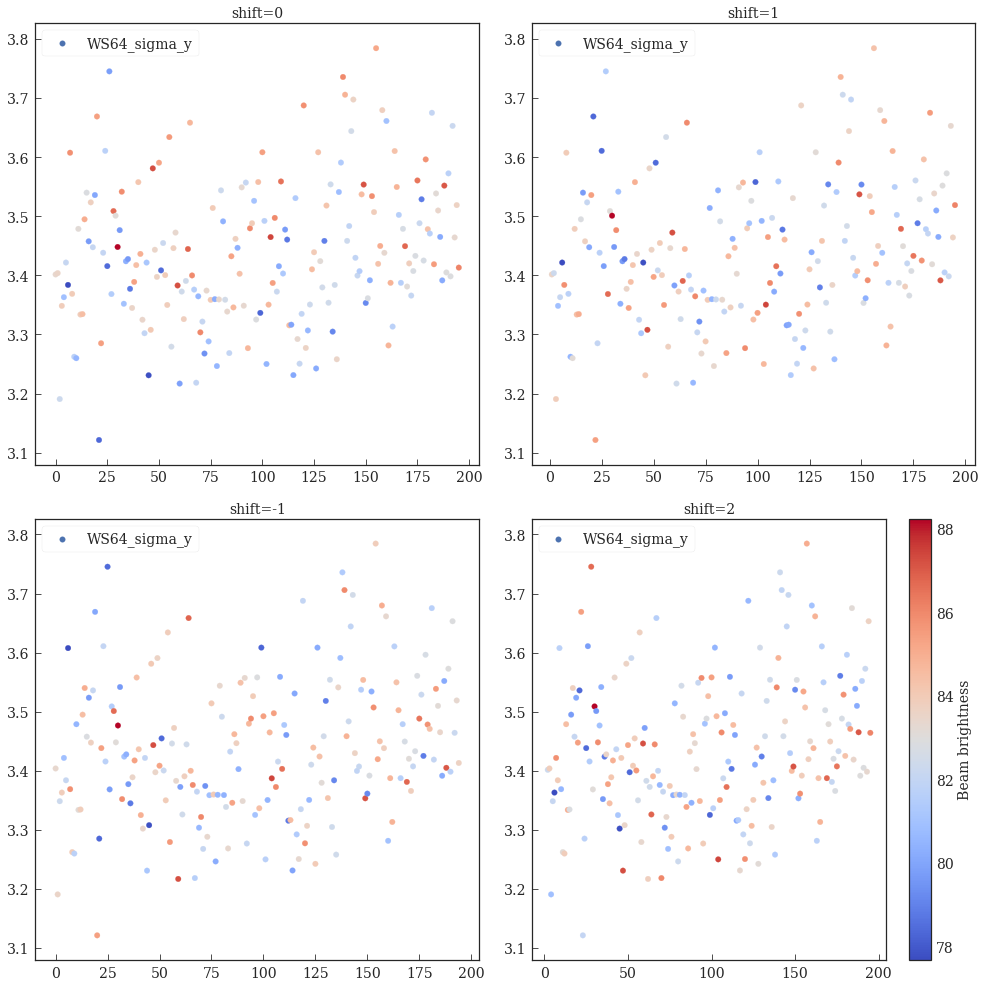

In [8]:
fig, ax = plt.subplots(2,2,figsize=(14,14),sharey=False)

yy = myDataFrame['WS64_sigma_y'].shift(0);  yy1=yy
xx = np.linspace(0, len(yy)-1, len(yy))
cc= myDataFrame['Intensity_max']
p1 = ax[0,0].scatter(xx, yy, c = cc, cmap=plt.cm.coolwarm)
# clb = fig.colorbar(p1)
# clb.set_label('Beam brightness')
ax[0,0].legend(frameon=True)
ax[0,0].set_title('shift=0')


yy = myDataFrame['WS64_sigma_y'].shift(1); yy1=yy
xx = np.linspace(0, len(yy)-1, len(yy))
cc= myDataFrame['Intensity_max']
p1 = ax[0,1].scatter(xx, yy, c = cc, cmap=plt.cm.coolwarm)
clb = fig.colorbar(p1)
clb.set_label('Beam brightness')
ax[0,1].legend(frameon=True)
ax[0,1].set_title('shift=1')


yy = myDataFrame['WS64_sigma_y'].shift(-1);  yy1=yy
xx = np.linspace(0, len(yy)-1, len(yy))
cc= myDataFrame['Intensity_max']
p1 = ax[1,0].scatter(xx, yy, c = cc, cmap=plt.cm.coolwarm)
# clb = fig.colorbar(p1)
# clb.set_label('Beam brightness')
ax[1,0].legend(frameon=True)
ax[1,0].set_title('shift=-1')

 
yy = myDataFrame['WS64_sigma_y'].shift(2); yy1=yy
xx = np.linspace(0, len(yy)-1, len(yy))
cc= myDataFrame['Intensity_max']
p1 = ax[1,1].scatter(xx, yy, c = cc, cmap=plt.cm.coolwarm)
# clb = fig.colorbar(p1)
# clb.set_label('Beam brightness')
ax[1,1].legend(frameon=True)
ax[1,1].set_title('shift=2')

fig.tight_layout()

# Check the sigma with and without scattering

WS85 first 2.45246625039 +/- 0.0355687331335
WS85 second 2.41324976444 +/- 0.0391335204639
WS64 second 3.42302429755 +/- 0.116366894081
WS64 first 3.44833212415 +/- 0.118806601914


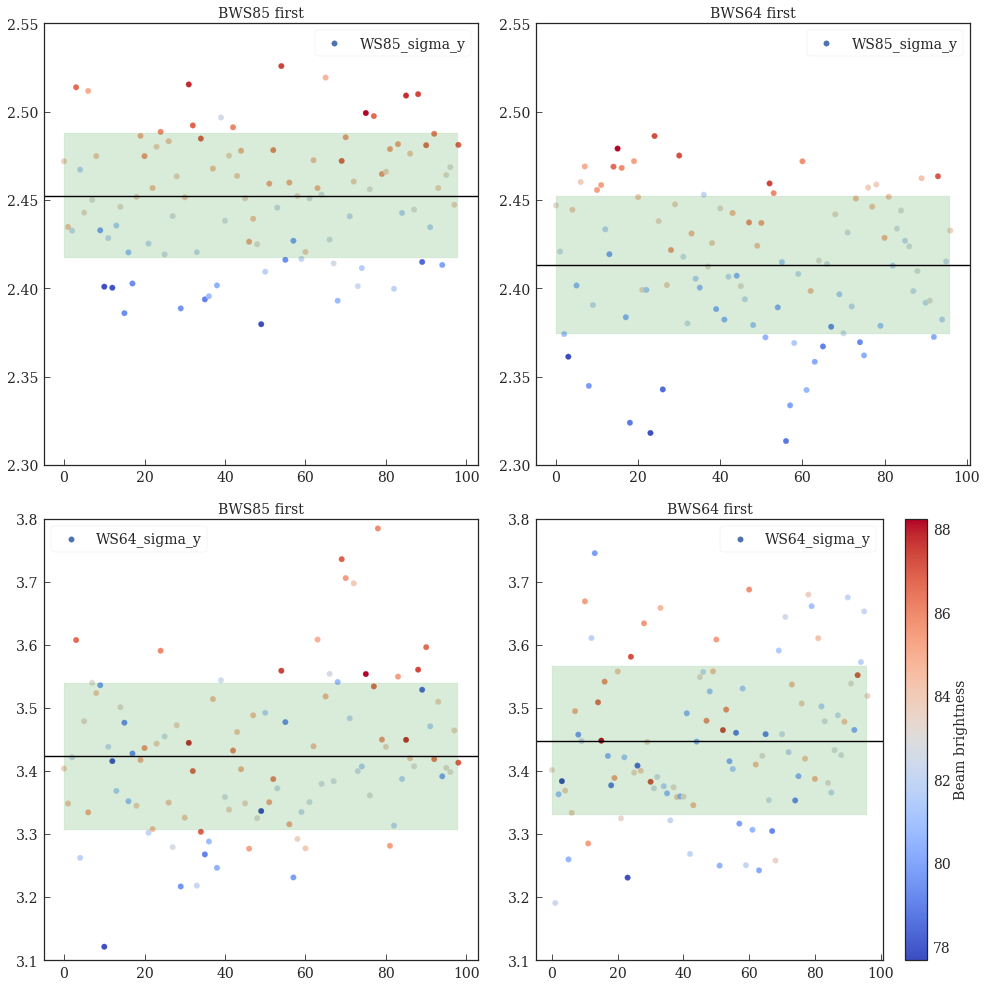

In [9]:
fig, ax = plt.subplots(2,2,figsize=(14,14),sharey=False)

yy = myDataFrame['WS85_sigma_y'].loc[myDataFrame['BWS64_first']==False];  yy1=yy
xx = np.linspace(0, len(yy)-1, len(yy))
cc= myDataFrame['Intensity_max'].loc[myDataFrame['BWS64_first']==False]
p1 = ax[0,0].scatter(xx, yy, c = cc, cmap=plt.cm.coolwarm)
# clb = fig.colorbar(p1)
# clb.set_label('Beam brightness')
ax[0,0].legend(frameon=True)
ax[0,0].set_title('BWS85 first')
ax[0,0].set_ylim(2.3, 2.55)
#statistical stuff
mean_two_ws =  np.mean(yy1); std_two_ws = np.std(yy1)
ax[0,0].axhline(y=mean_two_ws, xmin=ax[0,0].get_xlim()[0],xmax=ax[0,0].get_xlim()[1], c='k')
ax[0,0].fill_between(xx, mean_two_ws-std_two_ws, mean_two_ws+std_two_ws, color='g',alpha=0.15  )
print('WS85 first '+str(mean_two_ws)+' +/- '+str(std_two_ws))


yy = myDataFrame['WS85_sigma_y'].loc[myDataFrame['BWS64_first']==True]; yy1=yy
xx = np.linspace(0, len(yy)-1, len(yy))
cc= myDataFrame['Intensity_max'].loc[myDataFrame['BWS64_first']==True]
p1 = ax[0,1].scatter(xx, yy, c = cc, cmap=plt.cm.coolwarm)
clb = fig.colorbar(p1)
clb.set_label('Beam brightness')
ax[0,1].legend(frameon=True)
ax[0,1].set_title('BWS64 first')
ax[0,1].set_ylim(2.3, 2.55)
#statistical stuff
mean_two_ws =  np.mean(yy1); std_two_ws = np.std(yy1)
ax[0,1].axhline(y=mean_two_ws, xmin=ax[0,1].get_xlim()[0],xmax=ax[0,1].get_xlim()[1], c='k')
ax[0,1].fill_between(xx, mean_two_ws-std_two_ws, mean_two_ws+std_two_ws, color='g',alpha=0.15  )
print('WS85 second '+str(mean_two_ws)+' +/- '+str(std_two_ws))


yy = myDataFrame['WS64_sigma_y'].loc[myDataFrame['BWS64_first']==False];  yy1=yy
xx = np.linspace(0, len(yy)-1, len(yy))
cc= myDataFrame['Intensity_max'].loc[myDataFrame['BWS64_first']==False]
p1 = ax[1,0].scatter(xx, yy, c = cc, cmap=plt.cm.coolwarm)
# clb = fig.colorbar(p1)
# clb.set_label('Beam brightness')
ax[1,0].legend(frameon=True)
ax[1,0].set_title('BWS85 first')
ax[1,0].set_ylim(3.1,3.8)
#statistical stuff
mean_two_ws =  np.mean(yy1); std_two_ws = np.std(yy1)
ax[1,0].axhline(y=mean_two_ws, xmin=ax[1,0].get_xlim()[0],xmax=ax[1,0].get_xlim()[1], c='k')
ax[1,0].fill_between(xx, mean_two_ws-std_two_ws, mean_two_ws+std_two_ws, color='g',alpha=0.15  )
print('WS64 second '+str(mean_two_ws)+' +/- '+str(std_two_ws))

 
yy = myDataFrame['WS64_sigma_y'].loc[myDataFrame['BWS64_first']==True]; yy1=yy
xx = np.linspace(0, len(yy)-1, len(yy))
cc= myDataFrame['Intensity_max'].loc[myDataFrame['BWS64_first']==True]
p1 = ax[1,1].scatter(xx, yy, c = cc, cmap=plt.cm.coolwarm)
# clb = fig.colorbar(p1)
# clb.set_label('Beam brightness')
ax[1,1].legend(frameon=True)
ax[1,1].set_title('BWS64 first')
ax[1,1].set_ylim(3.1,3.8)
#statistical stuff
mean_two_ws =  np.mean(yy1); std_two_ws = np.std(yy1)
ax[1,1].axhline(y=mean_two_ws, xmin=ax[1,1].get_xlim()[0],xmax=ax[1,1].get_xlim()[1], c='k')
ax[1,1].fill_between(xx, mean_two_ws-std_two_ws, mean_two_ws+std_two_ws, color='g',alpha=0.15  )
print('WS64 first '+str(mean_two_ws)+' +/- '+str(std_two_ws))

fig.tight_layout()

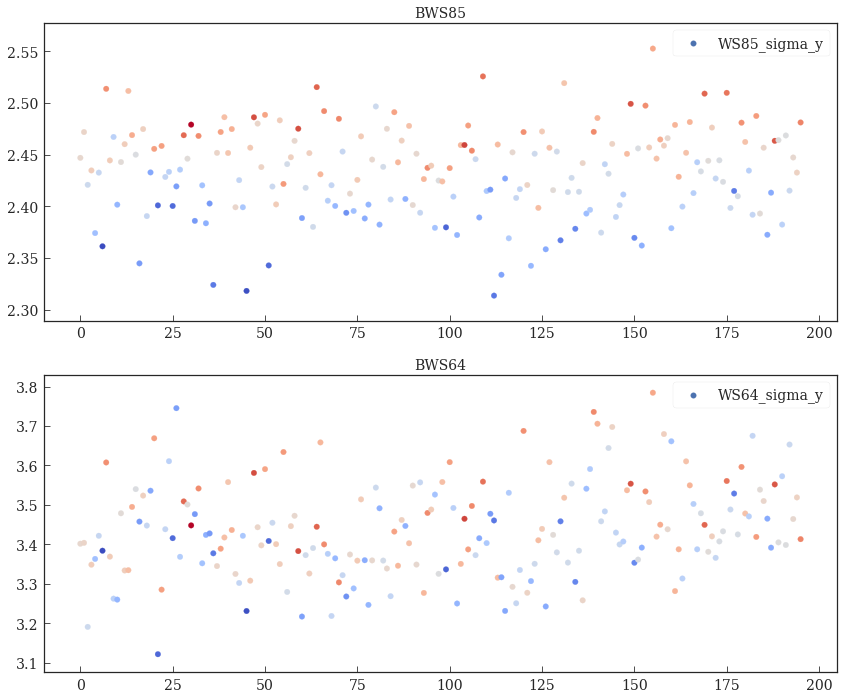

In [10]:
fig, ax = plt.subplots(2,1,figsize=(12,10))

yy = myDataFrame['WS85_sigma_y'];  yy1=yy
xx = np.linspace(0, len(yy)-1, len(yy))
cc= myDataFrame['Intensity_max']
p1 = ax[0].scatter(xx, yy, c = cc, cmap=plt.cm.coolwarm)
# clb = fig.colorbar(p1)
# clb.set_label('Beam brightness')
ax[0].legend(frameon=True)
ax[0].set_title('BWS85')

yy = myDataFrame['WS64_sigma_y'];
xx = np.linspace(0, len(yy)-1, len(yy))
cc= myDataFrame['Intensity_max']
p1 = ax[1].scatter(xx, yy, c = cc, cmap=plt.cm.coolwarm)
# clb = fig.colorbar(p1)
# clb.set_label('Beam brightness')
ax[1].legend(frameon=True)
ax[1].set_title('BWS64')

fig.tight_layout()

# Same stuff, but with intensity normalisation

- This makes sense for the single wire data ! The others are already remixed by the scattering

(array([ 1.15436486,  0.01542243]), array([  4.85631796e-03,   7.05959531e-07]))


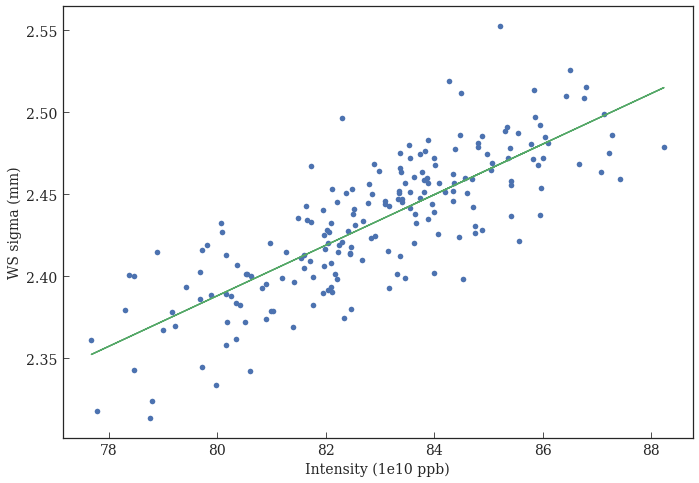

In [11]:
# find correlation parameter for the single wirescanner one 
xx = myDataFrame['Intensity_max']
yy = myDataFrame['WS85_sigma_y']

fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(xx, yy, 'o')
ax.set_xlabel('Intensity (1e10 ppb)')
ax.set_ylabel('WS sigma (mm)')

from scipy.optimize import curve_fit
def lin(x, a, b):
    return a + b*x

popt, pcov = curve_fit(lin, xx, yy )
print(popt, np.diag(pcov))
plt.plot(xx, lin(xx, *popt))

fig.tight_layout()

In [12]:
# using manual scaling
def scale_sigma(intensity, sigma):
    '''
    Scale the sigma due to the Intensity of 85e10 ppb
    '''
    a = 1.15436486
    b = 0.01542243
    
    corr_factor = lin(intensity, a, b) / lin(85, a, b)
    return sigma/corr_factor

myDataFrame['WS85_sigma_y_corrected'] = scale_sigma(myDataFrame['Intensity_max'], myDataFrame['WS85_sigma_y'])



(array([ 2.03960815,  0.01683656]), array([  9.42887960e-02,   1.37066962e-05]))


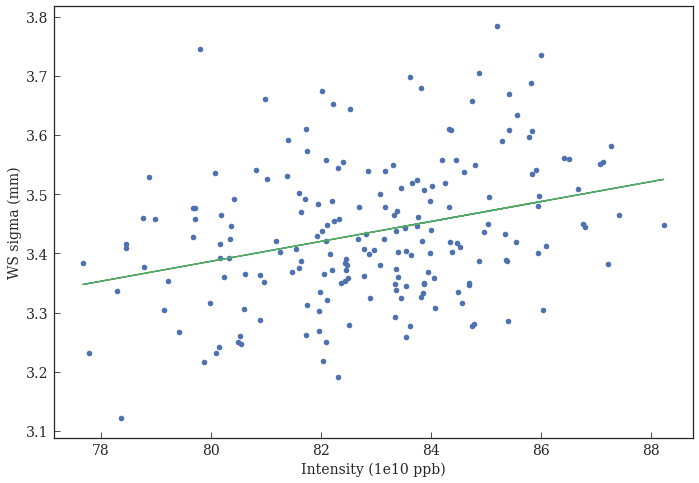

In [13]:
# find correlation parameter for the single wirescanner one 
xx = myDataFrame['Intensity_max']
yy = myDataFrame['WS64_sigma_y']

fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(xx, yy, 'o')
ax.set_xlabel('Intensity (1e10 ppb)')
ax.set_ylabel('WS sigma (mm)')

from scipy.optimize import curve_fit
def lin(x, a, b):
    return a + b*x

popt, pcov = curve_fit(lin, xx, yy )
print(popt, np.diag(pcov))
plt.plot(xx, lin(xx, *popt))

fig.tight_layout()

In [14]:
# using manual scaling
def scale_sigma(intensity, sigma):
    '''
    Scale the sigma due to the Intensity of 85e10 ppb
    '''
    a = 2.03960815
    b = 0.01683656
    
    corr_factor = lin(intensity, a, b) / lin(85, a, b)
    return sigma/corr_factor

myDataFrame['WS64_sigma_y_corrected'] = scale_sigma(myDataFrame['Intensity_max'], myDataFrame['WS64_sigma_y'])




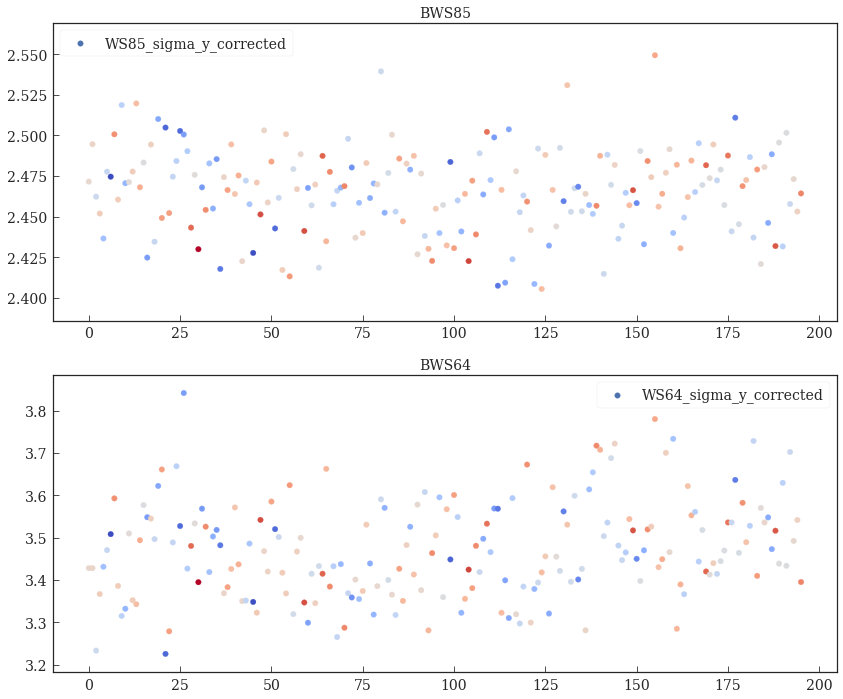

In [15]:
fig, ax = plt.subplots(2,1,figsize=(12,10))

yy = myDataFrame['WS85_sigma_y_corrected'];  yy1=yy
xx = np.linspace(0, len(yy)-1, len(yy))
cc= myDataFrame['Intensity_max']
p1 = ax[0].scatter(xx, yy, c = cc, cmap=plt.cm.coolwarm)
# clb = fig.colorbar(p1)
# clb.set_label('Beam brightness')
ax[0].legend(frameon=True)
ax[0].set_title('BWS85')

yy = myDataFrame['WS64_sigma_y_corrected'];
xx = np.linspace(0, len(yy)-1, len(yy))
cc= myDataFrame['Intensity_max']
p1 = ax[1].scatter(xx, yy, c = cc, cmap=plt.cm.coolwarm)
# clb = fig.colorbar(p1)
# clb.set_label('Beam brightness')
ax[1].legend(frameon=True)
ax[1].set_title('BWS64')

fig.tight_layout()

WS85 first 2.48154462215 +/- 0.019520260038
WS85 second 2.44866133925 +/- 0.0204222977334
WS64 second 3.45429754192 +/- 0.109350048271
WS64 first 3.48747432254 +/- 0.115432403302


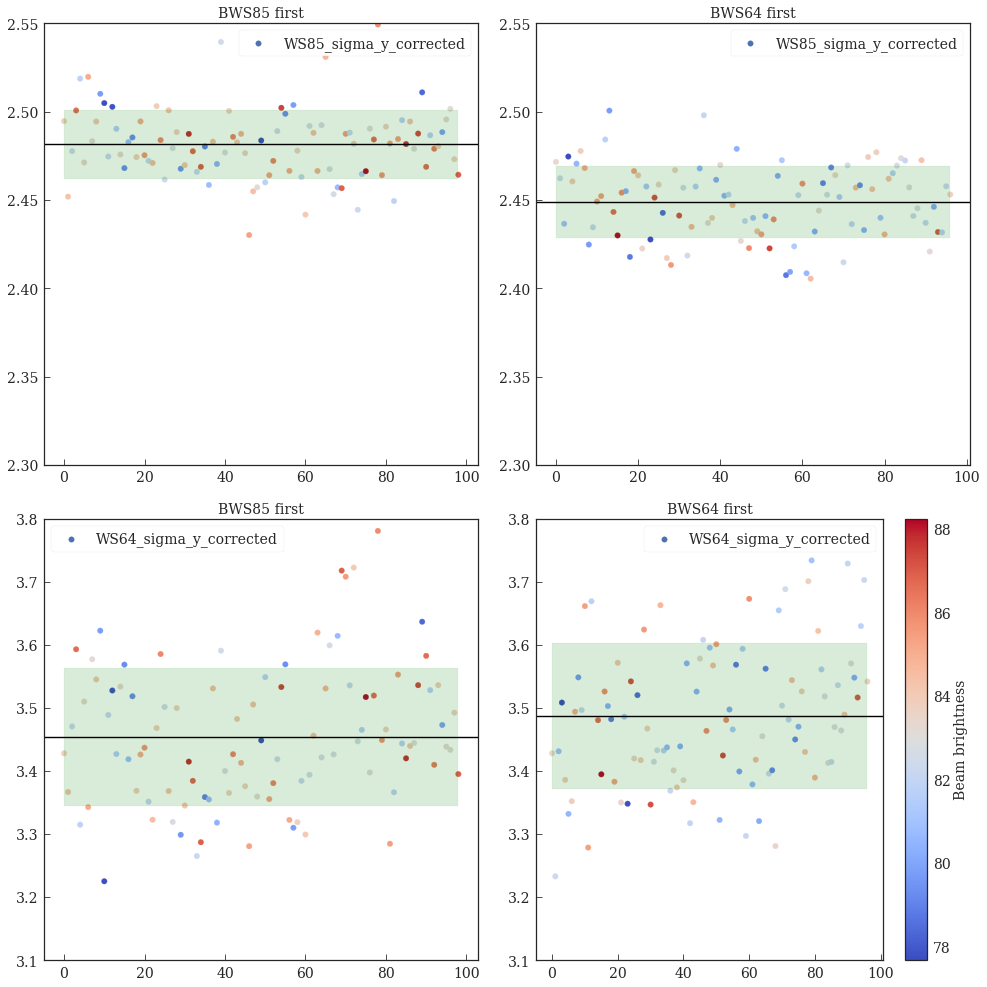

In [16]:
fig, ax = plt.subplots(2,2,figsize=(14,14),sharey=False)

yy = myDataFrame['WS85_sigma_y_corrected'].loc[myDataFrame['BWS64_first']==False];  yy1=yy
xx = np.linspace(0, len(yy)-1, len(yy))
cc= myDataFrame['Intensity_max'].loc[myDataFrame['BWS64_first']==False]
p1 = ax[0,0].scatter(xx, yy, c = cc, cmap=plt.cm.coolwarm)
# clb = fig.colorbar(p1)
# clb.set_label('Beam brightness')
ax[0,0].legend(frameon=True)
ax[0,0].set_title('BWS85 first')
ax[0,0].set_ylim(2.3, 2.55)
#statistical stuff
mean_two_ws =  np.mean(yy1); std_two_ws = np.std(yy1)
ax[0,0].axhline(y=mean_two_ws, xmin=ax[0,0].get_xlim()[0],xmax=ax[0,0].get_xlim()[1], c='k')
ax[0,0].fill_between(xx, mean_two_ws-std_two_ws, mean_two_ws+std_two_ws, color='g',alpha=0.15  )
print('WS85 first '+str(mean_two_ws)+' +/- '+str(std_two_ws))


yy = myDataFrame['WS85_sigma_y_corrected'].loc[myDataFrame['BWS64_first']==True]; yy1=yy
xx = np.linspace(0, len(yy)-1, len(yy))
cc= myDataFrame['Intensity_max'].loc[myDataFrame['BWS64_first']==True]
p1 = ax[0,1].scatter(xx, yy, c = cc, cmap=plt.cm.coolwarm)
clb = fig.colorbar(p1)
clb.set_label('Beam brightness')
ax[0,1].legend(frameon=True)
ax[0,1].set_title('BWS64 first')
ax[0,1].set_ylim(2.3, 2.55)
#statistical stuff
mean_two_ws =  np.mean(yy1); std_two_ws = np.std(yy1)
ax[0,1].axhline(y=mean_two_ws, xmin=ax[0,1].get_xlim()[0],xmax=ax[0,1].get_xlim()[1], c='k')
ax[0,1].fill_between(xx, mean_two_ws-std_two_ws, mean_two_ws+std_two_ws, color='g',alpha=0.15  )
print('WS85 second '+str(mean_two_ws)+' +/- '+str(std_two_ws))


yy = myDataFrame['WS64_sigma_y_corrected'].loc[myDataFrame['BWS64_first']==False];  yy1=yy
xx = np.linspace(0, len(yy)-1, len(yy))
cc= myDataFrame['Intensity_max'].loc[myDataFrame['BWS64_first']==False]
p1 = ax[1,0].scatter(xx, yy, c = cc, cmap=plt.cm.coolwarm)
# clb = fig.colorbar(p1)
# clb.set_label('Beam brightness')
ax[1,0].legend(frameon=True)
ax[1,0].set_title('BWS85 first')
ax[1,0].set_ylim(3.1,3.8)
#statistical stuff
mean_two_ws =  np.mean(yy1); std_two_ws = np.std(yy1)
ax[1,0].axhline(y=mean_two_ws, xmin=ax[1,0].get_xlim()[0],xmax=ax[1,0].get_xlim()[1], c='k')
ax[1,0].fill_between(xx, mean_two_ws-std_two_ws, mean_two_ws+std_two_ws, color='g',alpha=0.15  )
print('WS64 second '+str(mean_two_ws)+' +/- '+str(std_two_ws))

 
yy = myDataFrame['WS64_sigma_y_corrected'].loc[myDataFrame['BWS64_first']==True]; yy1=yy
xx = np.linspace(0, len(yy)-1, len(yy))
cc= myDataFrame['Intensity_max'].loc[myDataFrame['BWS64_first']==True]
p1 = ax[1,1].scatter(xx, yy, c = cc, cmap=plt.cm.coolwarm)
# clb = fig.colorbar(p1)
# clb.set_label('Beam brightness')
ax[1,1].legend(frameon=True)
ax[1,1].set_title('BWS64 first')
ax[1,1].set_ylim(3.1,3.8)
#statistical stuff
mean_two_ws =  np.mean(yy1); std_two_ws = np.std(yy1)
ax[1,1].axhline(y=mean_two_ws, xmin=ax[1,1].get_xlim()[0],xmax=ax[1,1].get_xlim()[1], c='k')
ax[1,1].fill_between(xx, mean_two_ws-std_two_ws, mean_two_ws+std_two_ws, color='g',alpha=0.15  )
print('WS64 first '+str(mean_two_ws)+' +/- '+str(std_two_ws))

fig.tight_layout()

# Conclusions

- ...